# **Installation**




In [ ]:
pip install -U cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.8 MB/s eta 0:00:00
  Created wheel f

In [ ]:
pip install -U cellxgene-census[experimental]

# **Python quick start**

In [ ]:
import cellxgene_census

help(cellxgene_census)
help(cellxgene_census.get_anndata)

/usr/local/lib/python3.10/dist-packages/tiledb/cloud/config.py:96: UserWarning: You must first login before you can run commands. Please run tiledb.cloud.login.
  warnings.warn(


Help on package cellxgene_census:

NAME
    cellxgene_census - An API to facilitate use of the CZI Science CELLxGENE Census. The Census is a versioned container of single-cell data hosted at `CELLxGENE Discover`_.

DESCRIPTION
    The API is built on the `tiledbsoma` SOMA API, and provides a number of helper functions including:
    
        * Open a named version of the Census, for use with the SOMA API
        * Get a list of available Census versions, and for each version, a description
        * Get a slice of the Census as an AnnData, for use with ScanPy
        * Get the URI for, or directly download, underlying data in H5AD format
    
    For more information on the API, visit the `cellxgene_census repo`_. For more information on SOMA, see the `tiledbsoma repo`_.
    
    .. _CELLxGENE Discover:
        https://cellxgene.cziscience.com/
    
    .. _cellxgene_census repo:
        https://github.com/chanzuckerberg/cellxgene-census/
    
    .. _tiledbsoma repo:
        https://g

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


            assay        cell_type                          tissue  \
0       10x 5' v1           neuron                            lung   
1       10x 5' v1           neuron                            lung   
2       10x 5' v1           neuron                            lung   
3       10x 5' v1           neuron                            lung   
4       10x 5' v1           neuron                            lung   
...           ...              ...                             ...   
732776  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732777  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732778  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732779  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   
732780  10x 3' v3  microglial cell  dorsolateral prefrontal cortex   

       tissue_general suspension_type   disease     sex  
0                lung            cell    normal  female  
1                lung            cell    no

In [ ]:
import cellxgene_census

with cellxgene_census.open_soma() as census:
    adata = cellxgene_census.get_anndata(
        census = census,
        organism = "Homo sapiens",
        var_value_filter = "feature_id in ['ENSG00000161798', 'ENSG00000188229']",
        obs_value_filter = "sex == 'female' and cell_type in ['microglial cell', 'neuron']",
        column_names = {"obs": ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease"]},
    )

    print(adata)

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
<ipython-input-11-31ea77b51fb3>:4: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


AnnData object with n_obs × n_vars = 732781 × 2
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'


In [ ]:
import cellxgene_census
import tiledbsoma

with cellxgene_census.open_soma() as census:

    human = census["census_data"]["homo_sapiens"]
    query = human.axis_query(
       measurement_name = "RNA",
       obs_query = tiledbsoma.AxisQuery(
           value_filter = "tissue == 'brain' and sex == 'male'"
       )
    )


The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


In [ ]:
    # Continued from above

    iterator = query.X("raw").tables()

    # Get an iterative slice as pyarrow.Table
    raw_slice = next (iterator)


In [ ]:
query.close()

NameError: name 'query' is not defined

In [ ]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=90d4bd95a29ce5dac98e837586993bf7cfe821518129db40c0115b11a9f476cb
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeatu

In [ ]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)


Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [ ]:
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))

print("\nMapping from gene ID to gene name (first 20 mappings):")
for gene_id, gene_name in list(gene_mapping.items())[:20]:
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")


Mapping from gene ID to gene name (first 10 mappings):
Gene ID: ENSG00000278915, Gene Name: ENSG00000278915.1
Gene ID: ENSG00000168454, Gene Name: TXNDC2
Gene ID: ENSG00000139180, Gene Name: NDUFA9
Gene ID: ENSG00000229177, Gene Name: ENSG00000229177.1
Gene ID: ENSG00000204564, Gene Name: C6orf136
Gene ID: ENSG00000116717, Gene Name: GADD45A
Gene ID: ENSG00000254418, Gene Name: SPON1-AS1
Gene ID: ENSG00000114654, Gene Name: EFCC1
Gene ID: ENSG00000257894, Gene Name: ENSG00000257894.2
Gene ID: ENSG00000198398, Gene Name: TMEM207
Gene ID: ENSG00000085117, Gene Name: CD82
Gene ID: ENSG00000092140, Gene Name: G2E3
Gene ID: ENSG00000257008, Gene Name: GPR142
Gene ID: ENSG00000125877, Gene Name: ITPA
Gene ID: ENSG00000170430, Gene Name: MGMT
Gene ID: ENSG00000231662, Gene Name: ENSG00000231662.1
Gene ID: ENSG00000140853, Gene Name: NLRC5
Gene ID: ENSG00000261198, Gene Name: ENSG00000261198.1
Gene ID: ENSG00000185610, Gene Name: DBX2
Gene ID: ENSG00000171475, Gene Name: WIPF2


In [ ]:
# Extract and display the values under each attribute in obs
for obs_attr in adata.obs.columns:
    print(f"\nValues for obs attribute '{obs_attr}':")
    print(adata.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata.var.columns:
    print(f"\nValues for var attribute '{var_attr}':")
    print(adata.var[var_attr].values)


Values for obs attribute 'nCount_RNA':
[ 927. 1251. 2972. ... 5511. 9837. 6275.]

Values for obs attribute 'nFeature_RNA':
[ 694  886 1695 ... 2269 3440 2510]

Values for obs attribute 'percent.mt':
[1.83387271 6.47482014 0.20188425 ... 6.06060606 3.15136729 1.56175299]

Values for obs attribute 'SORT':
['MAP2', 'MAP2', 'MAP2', 'MAP2', 'MAP2', ..., 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control', 'MAP2control']
Length: 23197
Categories (3, object): ['AT8', 'MAP2', 'MAP2control']

Values for obs attribute 'Amyloid':
['C3', 'C3', 'C3', 'C3', 'C3', ..., 'No', 'No', 'No', 'No', 'No']
Length: 23197
Categories (3, object): ['C3', 'DP (C0)', 'No']

Values for obs attribute 'Age':
['73', '73', '73', '73', '73', ..., '71', '71', '71', '71', '71']
Length: 23197
Categories (14, object): ['57', '61', '62', '66', ..., '81', '87', '89', '93']

Values for obs attribute 'RIN':
['5.7', '5.7', '5.7', '5.7', '5.7', ..., '6.5', '6.5', '6.5', '6.5', '6.5']
Length: 23197
Categories (10, object):

In [ ]:
genes_of_interest = ['TXNDC2', 'NDUFA9', 'SLC26A3', 'RASGEF1B', 'RP11-701H24.9', 'LINGO1', 'PDE4DIP', 'RP11-289H16.1', 'AC159540.1', 'RP11-219A15.1', 'LINC01609', 'PHYHIP', 'RP11-745L13.2', 'GADD45A', 'SPON1-AS1']
adata_filtered = adata[:,adata.var['feature_name'].isin(genes_of_interest)]
print(adata_filtered)

unmatched_gene_ids = ['ENSG00000224363','ENST00000557230', 'ENST00000551312','ENSG00000230606', 'ENST00000411738', 'ENST00000430893','ENSG00000266302','ENSG00000251555']
adata_slice_unmatched_genes = adata[:,adata.var.index.isin(unmatched_gene_ids)]
print(adata_slice_unmatched_genes)

View of AnnData object with n_obs × n_vars = 23197 × 10
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
View of AnnData object with n_obs × n_vars = 23197 × 4
    obs: 'nCount_RNA', 'nFeature_RNA', '

In [ ]:
# to get the top 10 genes which are most affected in case of alzheimer v/s normal cells

scanpy.tl.rank_genes_groups(adata_filtered, groupby='disease', groups=['Alzheimer disease'], reference='normal', method='t-test')
top_genes = adata_filtered.uns['rank_genes_groups']['names']['Alzheimer disease']
top_10_genes = top_genes[:10]  # Slicing to get the first 10 genes
print("Top 10 differentially expressed genes in Alzheimer disease:")
for gene_id in top_10_genes:
    gene_name = gene_mapping.get(gene_id, "Unknown Gene")  # Fetch gene name from mapping
    print(gene_name)
  #print(gene_id)

Top 10 differentially expressed genes in Alzheimer disease:
RASGEF1B
GPS2
PCSK1N
BCOR
MALAT1
USP39
LINGO1
ENSG00000255422.4
ATP5F1D
SLC26A3


['Alzheimer disease', 'normal']
Categories (2, object): ['Alzheimer disease', 'normal']


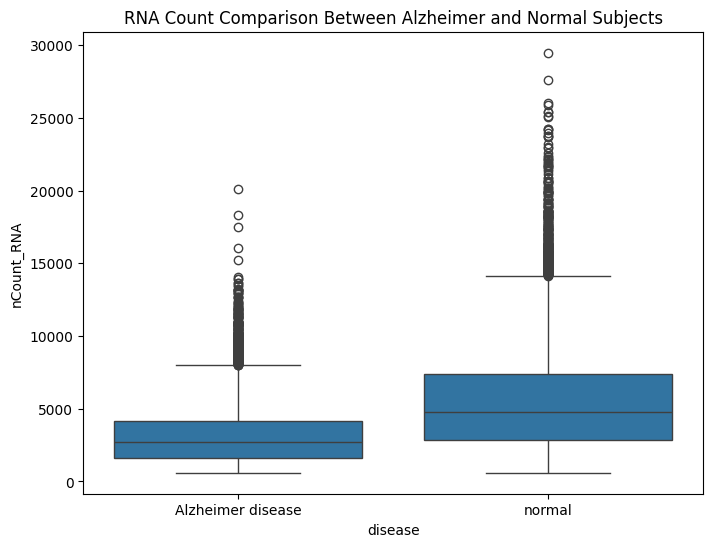

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'disease' column
print(adata.obs['disease'].unique())

# Compare total RNA counts (nCount_RNA) between the groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='nCount_RNA', data=adata.obs)
plt.title("RNA Count Comparison Between Alzheimer and Normal Subjects")
plt.show()

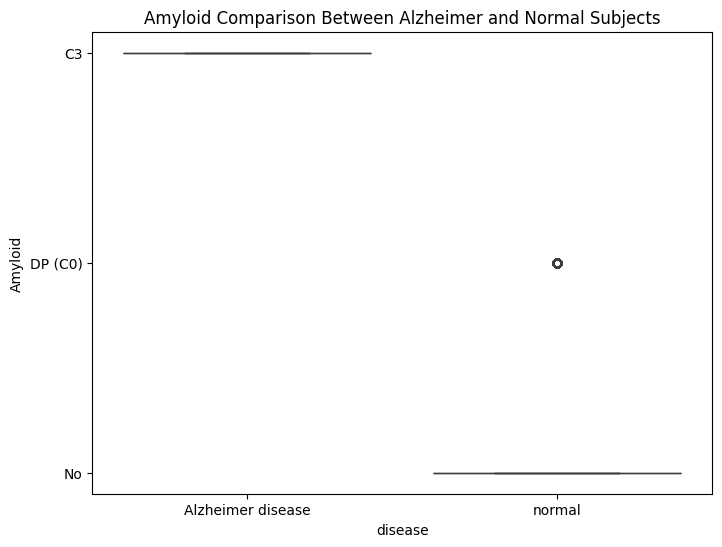

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='Amyloid', data=adata.obs)
plt.title("Amyloid Comparison Between Alzheimer and Normal Subjects")
plt.show()

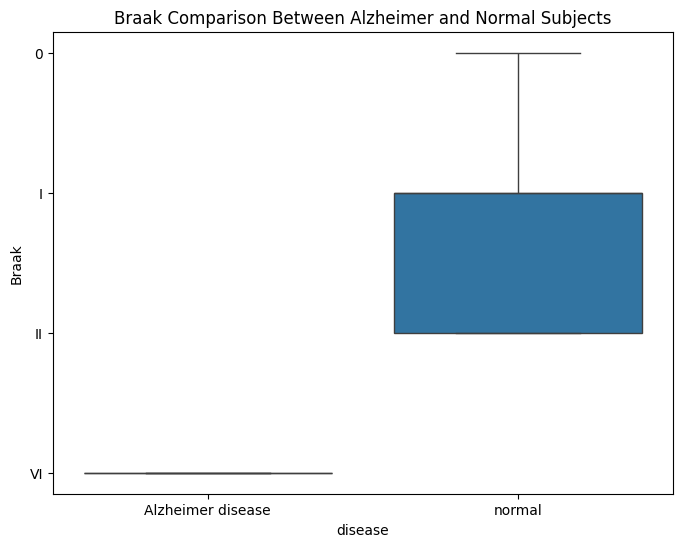

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='Braak', data=adata.obs)
plt.title("Braak Comparison Between Alzheimer and Normal Subjects")
plt.show()

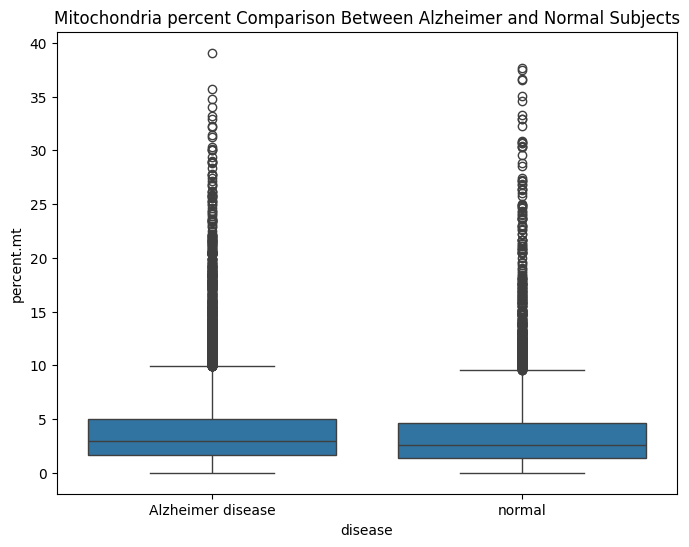

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='percent.mt', data=adata.obs)
plt.title("Mitochondria percent Comparison Between Alzheimer and Normal Subjects")
plt.show()

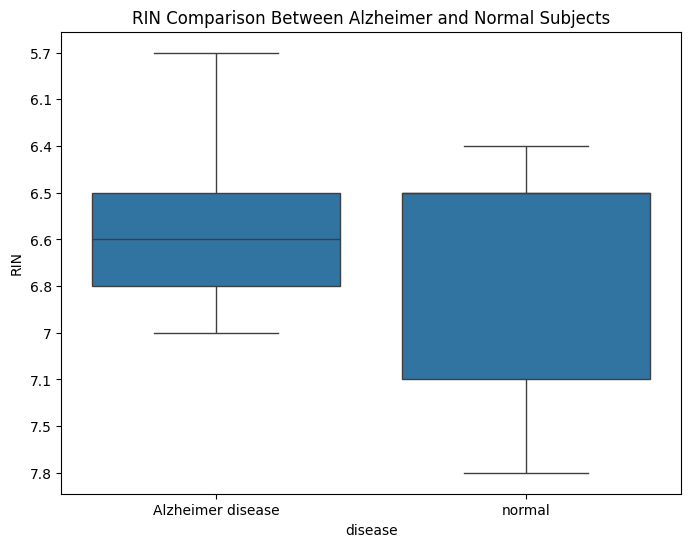

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='disease', y='RIN', data=adata.obs)
plt.title("RIN Comparison Between Alzheimer and Normal Subjects")
plt.show()

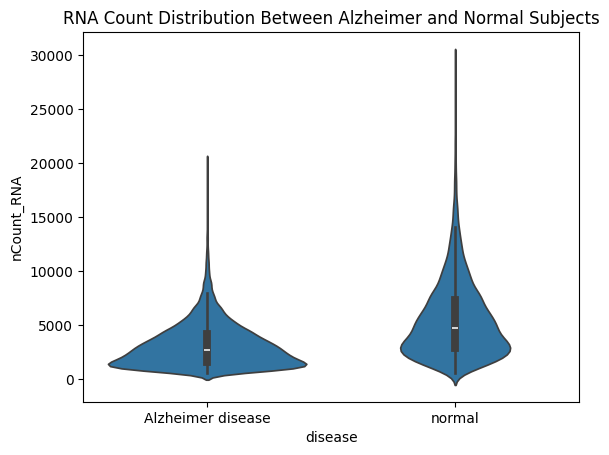

In [ ]:
sns.violinplot(x='disease', y='nCount_RNA', data=adata.obs)
plt.title("RNA Count Distribution Between Alzheimer and Normal Subjects")
plt.show()

In [ ]:
import scanpy as sc

# Filter out low-quality cells/genes if needed
adata_filtered = adata[adata.obs['disease'].isin(['Alzheimer disease', 'normal'])].copy()

In [ ]:
sc.pp.normalize_total(adata_filtered, target_sum=1e4)
sc.pp.log1p(adata_filtered)

# Scale the data
sc.pp.scale(adata_filtered, max_value=10)

In [ ]:
sc.tl.rank_genes_groups(adata_filtered, groupby='disease', groups=['Alzheimer disease'], reference='normal', method='t-test')

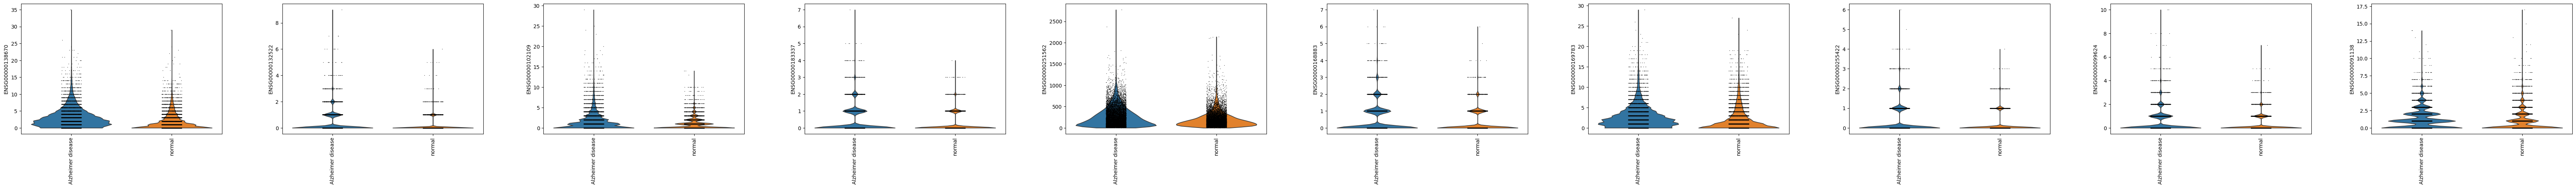

In [ ]:
sc.pl.violin(adata_filtered, keys=top_upregulated_genes, groupby='disease', rotation=90)

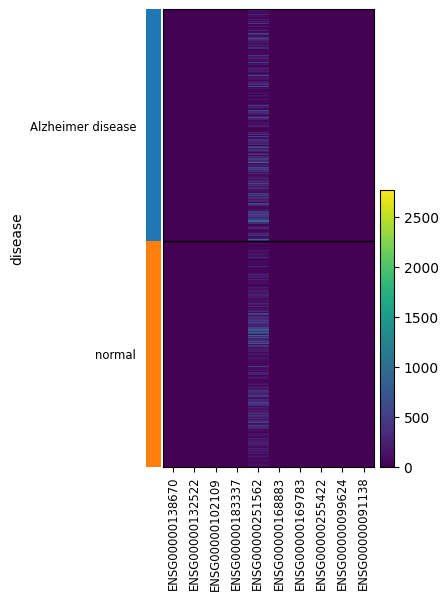

In [ ]:
sc.pl.heatmap(adata_filtered, var_names=top_upregulated_genes, groupby='disease')

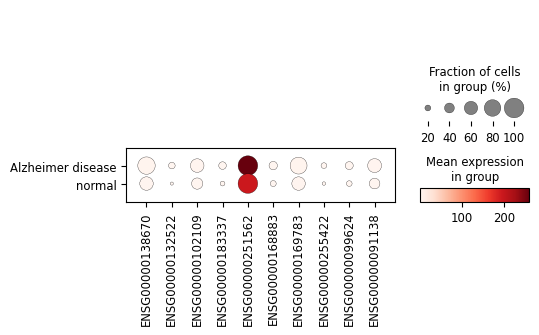

In [ ]:
sc.pl.dotplot(adata_filtered, var_names=top_upregulated_genes, groupby='disease')

Analyzing by AGE

In [ ]:
import pandas as pd
# Ensure 'age' is numeric
adata.obs['age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')

# Define age groups (you can adjust the age ranges as needed)
adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])

In [ ]:
grouped_data = adata.obs.groupby(['age_group', 'disease'])
print(grouped_data)

<ipython-input-51-5f2fceedbb83>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = adata.obs.groupby(['age_group', 'disease'])


In [ ]:
import pandas as pd

# Define genes of interest
genes_of_interest = ["GADD45A", "NDUFA9", "TXNDC2", "SPON1-AS1"]

# Filter to get indices of genes of interest in adata.var
gene_indices = [adata.var[adata.var['feature_name'] == gene].index[0] for gene in genes_of_interest if gene in adata.var['feature_name'].values]

# Extract expression data for genes of interest
adata_genes_filtered = adata[:, gene_indices]

# Convert adata.X to a DataFrame, add 'disease' and 'age_group' columns for grouping
expression_df = pd.DataFrame(adata_genes_filtered.X.toarray(), columns=genes_of_interest, index=adata.obs.index)
expression_df['disease'] = adata.obs['disease'].values
expression_df['age_group'] = adata.obs['age_group'].values

# Calculate the mean expression for each gene by age group and disease status
mean_expression_by_age_disease = expression_df.groupby(['age_group', 'disease'])[genes_of_interest].mean()

print("Mean expression by age group and disease status:")
print(mean_expression_by_age_disease)

Mean expression by age group and disease status:
                              GADD45A  NDUFA9  TXNDC2  SPON1-AS1
age_group disease                                               
57        Alzheimer disease       NaN     NaN     NaN        NaN
          normal             0.057982     0.0     0.0   0.002366
58-60     Alzheimer disease  0.023705     0.0     0.0   0.008284
          normal                  NaN     NaN     NaN        NaN
61-62     Alzheimer disease       NaN     NaN     NaN        NaN
          normal             0.066184     0.0     0.0   0.019148
63-66     Alzheimer disease       NaN     NaN     NaN        NaN
          normal             0.044465     0.0     0.0   0.007624
67        Alzheimer disease       NaN     NaN     NaN        NaN
          normal             0.046080     0.0     0.0   0.020988
68        Alzheimer disease       NaN     NaN     NaN        NaN
          normal             0.015228     0.0     0.0   0.017757
69-71     Alzheimer disease       NaN    

<ipython-input-56-8e12e52c14fd>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_by_age_disease = expression_df.groupby(['age_group', 'disease'])[genes_of_interest].mean()


<ipython-input-60-f3b7ba18b0ab>:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])


<Figure size 1200x800 with 0 Axes>

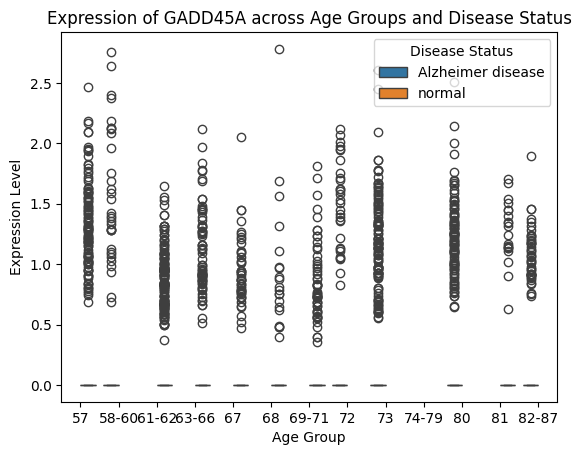

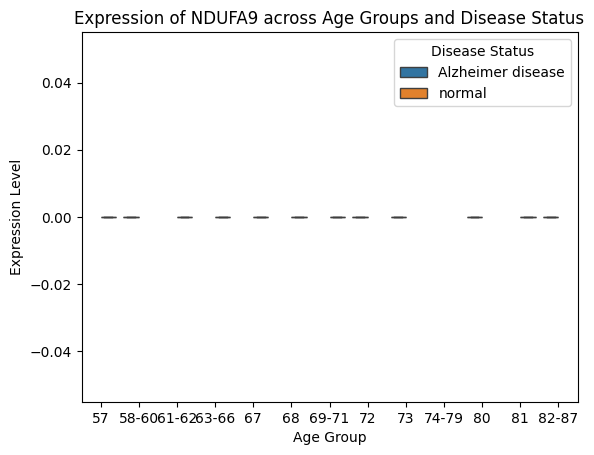

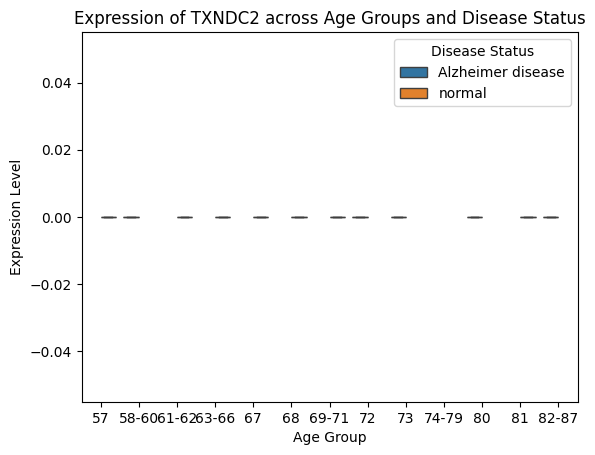

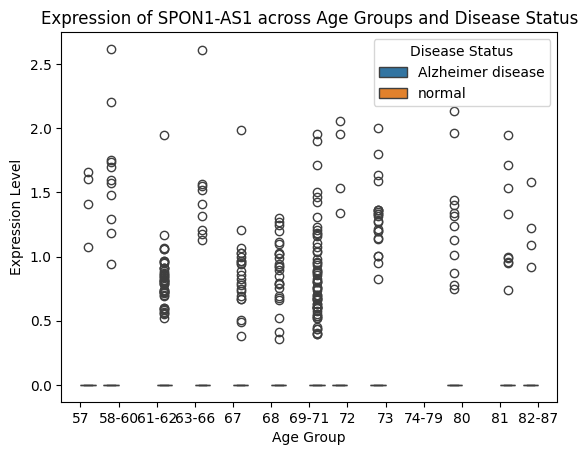

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Age' column to numeric, forcing errors to NaN
adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')

# Drop rows where Age is NaN
adata = adata[~adata.obs['Age'].isna()]

# Create age groups based on the cleaned Age data
adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])
# Verify that 'disease' is also a valid column
if 'disease' not in adata.obs.columns:
    raise ValueError("The 'disease' column is missing from the dataset.")

# Filter to include only genes of interest
genes_of_interest = ["GADD45A", "NDUFA9", "TXNDC2", "SPON1-AS1"]
gene_indices = [adata.var[adata.var['feature_name'] == gene].index[0] for gene in genes_of_interest if gene in adata.var['feature_name'].values]

# Extract relevant gene expression data
expression_data = pd.DataFrame(adata[:, gene_indices].X.toarray(), columns=genes_of_interest, index=adata.obs.index)
expression_data['age_group'] = adata.obs['age_group'].values
expression_data['disease'] = adata.obs['disease'].values

# Plotting each gene's expression for different age groups and disease categories
plt.figure(figsize=(12, 8))
for gene in genes_of_interest:
    if gene in expression_data.columns:
        plt.figure()
        sns.boxplot(x="age_group", y=gene, hue="disease", data=expression_data)
        plt.title(f"Expression of {gene} across Age Groups and Disease Status")
        plt.ylabel("Expression Level")
        plt.xlabel("Age Group")
        plt.legend(title="Disease Status")
        plt.show()



Analyze by SEX

['female', 'male']
Categories (2, object): ['female', 'male']


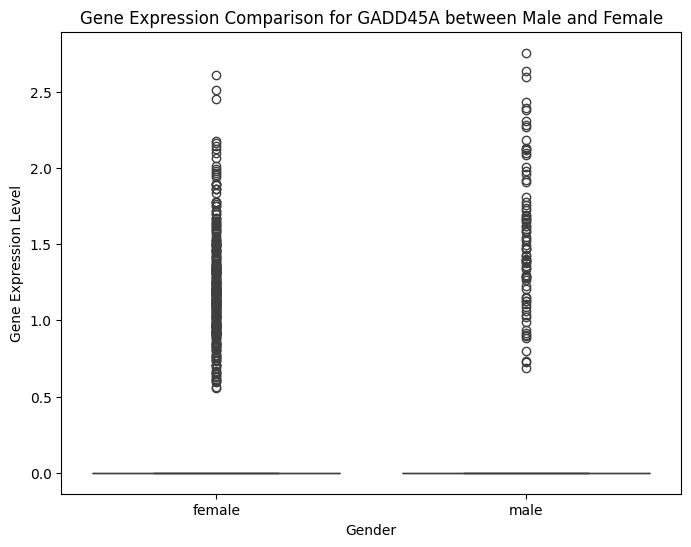

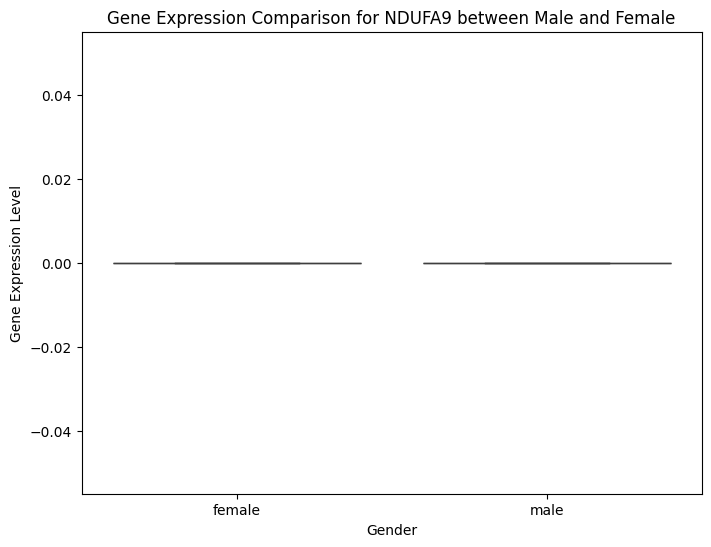

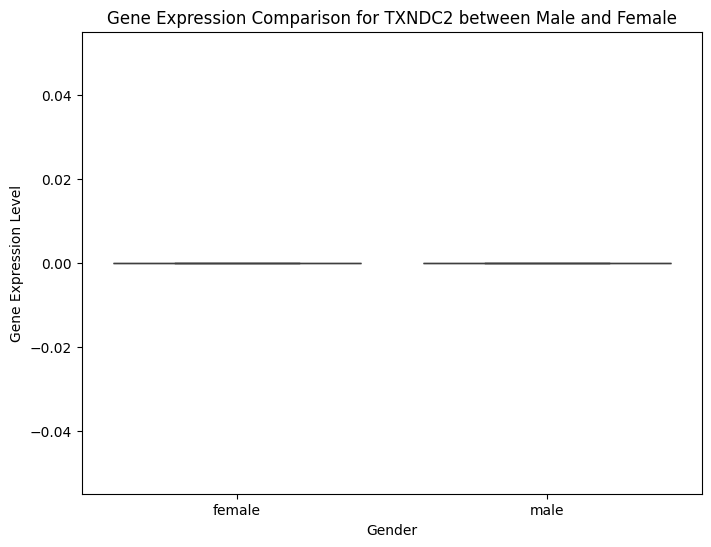

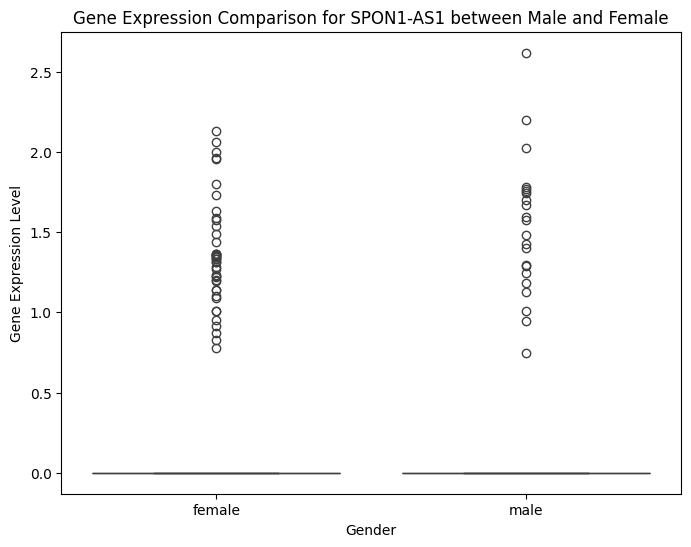

In [ ]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'adata' is your AnnData object containing the data
# Filter for Alzheimer's disease cases
adata_alzheimers = adata[adata.obs['disease'] == 'Alzheimer disease']

# Check unique values in the 'sex' column
print(adata_alzheimers.obs['sex'].unique())

# Define the genes of interest
genes_of_interest = ['GADD45A', 'NDUFA9', 'TXNDC2', 'SPON1-AS1']

# Ensure the genes are present in the data
present_genes = [gene for gene in genes_of_interest if gene in adata_alzheimers.var['feature_name'].values]

# Filter the dataset to include only the genes of interest
adata_filtered = adata_alzheimers[:, adata_alzheimers.var['feature_name'].isin(present_genes)]

# Create a DataFrame for gene expression values
# Ensure that the shape of the data is correct
gene_expression_data = adata_filtered.X if isinstance(adata_filtered.X, np.ndarray) else adata_filtered.X.A  # Convert to numpy if sparse
df = pd.DataFrame(gene_expression_data, columns=adata_filtered.var['feature_name'].values, index=adata_filtered.obs.index)

# Add the 'sex' column to the DataFrame
df['sex'] = adata_filtered.obs['sex'].values

# Plotting gene expression for male vs female
for gene in present_genes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y=gene, data=df)
    plt.title(f"Gene Expression Comparison for {gene} between Male and Female")
    plt.xlabel("Gender")
    plt.ylabel("Gene Expression Level")
    plt.show()
